## Cho dữ liệu ageinc_g.csv chứa thông tin khách hàng. 

## Phân tích thông tin sơ bộ về dữ liệu trên các thuộc tính income, age, gender. 
## Xem xét mối quan hệ giữa hai thuộc tính là income và age. 
## Trực quan hóa dữ liệu. 

## Để thực hiện bài toán Customer Segmentation (Phân cụm/ nhóm khách hàng) cần phải kiểm tra và chuẩn hóa dữ liệu. 
## Hãy chọn một phương pháp để chuẩn hóa dữ liệu dựa trên thông tin nêu trên. Trực quan hóa dữ liệu sau khi chuẩn hóa.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [60]:
customer = pd.read_csv('data4/Ex4_Customer_Segmentation/ageinc_g.csv', index_col=0)
customer

,income,age,gender
0,101743,58,Female
1,49597,27,Female
2,36517,52,Male
3,33223,49,Male
4,72994,53,Female
...,...,...,...
995,70615,29,Female
996,95102,41,Female
997,42203,35,Male
998,16975,31,Female


## Check for null values

In [61]:
customer.isnull().sum()

income    0
age       0
gender    0
dtype: int64

## Explor the "gender" feature

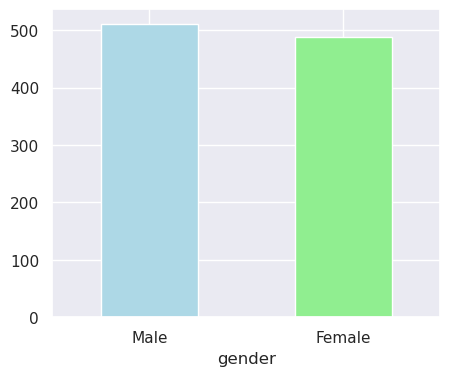

In [62]:
plt.figure(figsize=(5,4))
customer['gender'].value_counts().plot.bar(color=['lightblue','lightgreen'])
plt.xticks(rotation=0);

## Check for outliers in "income" and "age"

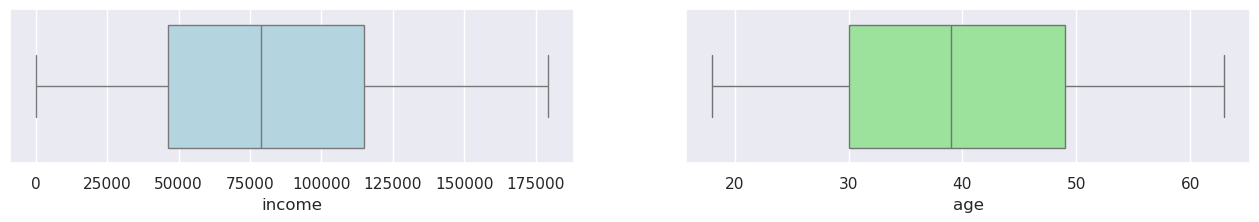

In [63]:
sbn.set_theme(style='darkgrid')
plt.figure(figsize=(16,2))
plt.subplot(1,2,1)
sbn.boxplot(customer['income'], color='lightblue', orient='h')
plt.subplot(1,2,2)
sbn.boxplot(customer['age'], color='lightgreen', orient='h')
plt.show()

## Visualize "income" and "age" before scaling|

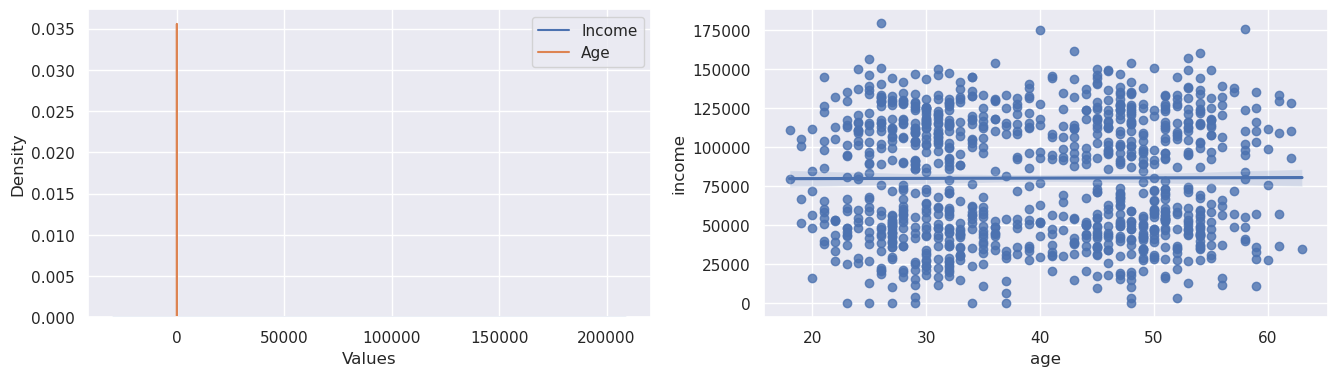

In [64]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sbn.kdeplot(customer['income'], label='Income')
sbn.kdeplot(customer['age'], label='Age')
plt.xlabel('Values')
plt.legend()
plt.subplot(1,2,2)
sbn.regplot(x=customer['age'], y=customer['income'])
plt.show()

## convert "gender" male => 1, female => 0

In [99]:
customer = pd.read_csv('data4/Ex4_Customer_Segmentation/ageinc_g.csv', index_col=0)
customer = pd.get_dummies(customer, drop_first=True, sparse=True)
customer

,income,age,gender_Male
0,101743,58,False
1,49597,27,False
2,36517,52,True
3,33223,49,True
4,72994,53,False
...,...,...,...
995,70615,29,False
996,95102,41,False
997,42203,35,True
998,16975,31,False


In [100]:
#Use .astype(int) to convert the True/False into 1/0
customer = customer.astype(int)
customer

,income,age,gender_Male
0,101743,58,0
1,49597,27,0
2,36517,52,1
3,33223,49,1
4,72994,53,0
...,...,...,...
995,70615,29,0
996,95102,41,0
997,42203,35,1
998,16975,31,0


## No outliers in both "income" and "age" => Use MinMaxScaler to reduce their gap

In [101]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
customer_scaled = minmax.fit_transform(customer)
customer_scaled = pd.DataFrame(customer_scaled, columns=customer.columns)

customer_scaled

,income,age,gender_Male
0,0.567465,0.888889,0.0
1,0.276624,0.200000,0.0
2,0.203671,0.755556,1.0
3,0.185299,0.688889,1.0
4,0.407119,0.777778,0.0
...,...,...,...
995,0.393850,0.244444,0.0
996,0.530425,0.511111,0.0
997,0.235384,0.377778,1.0
998,0.094677,0.288889,0.0


## Visualize "income" and "age" After MinMax scaling

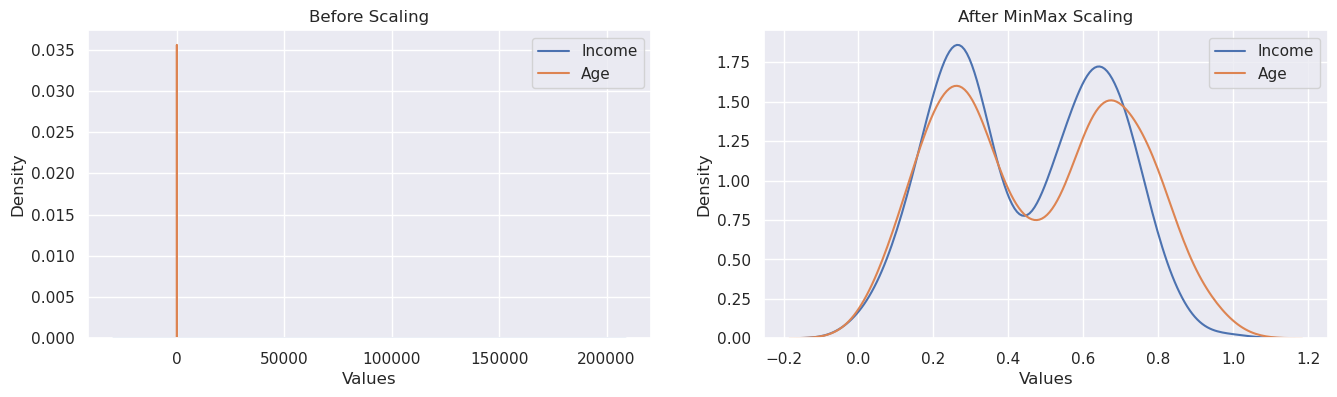

In [102]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sbn.kdeplot(customer['income'], label='Income')
sbn.kdeplot(customer['age'], label='Age')
plt.xlabel('Values')
plt.title('Before Scaling')
plt.legend()

plt.subplot(1,2,2)
sbn.kdeplot(customer_scaled['income'], label='Income')
sbn.kdeplot(customer_scaled['age'], label='Age')
plt.xlabel('Values')
plt.title('After MinMax Scaling')
plt.legend()
plt.show()

## Use scatterplot for better visualization of data clusters

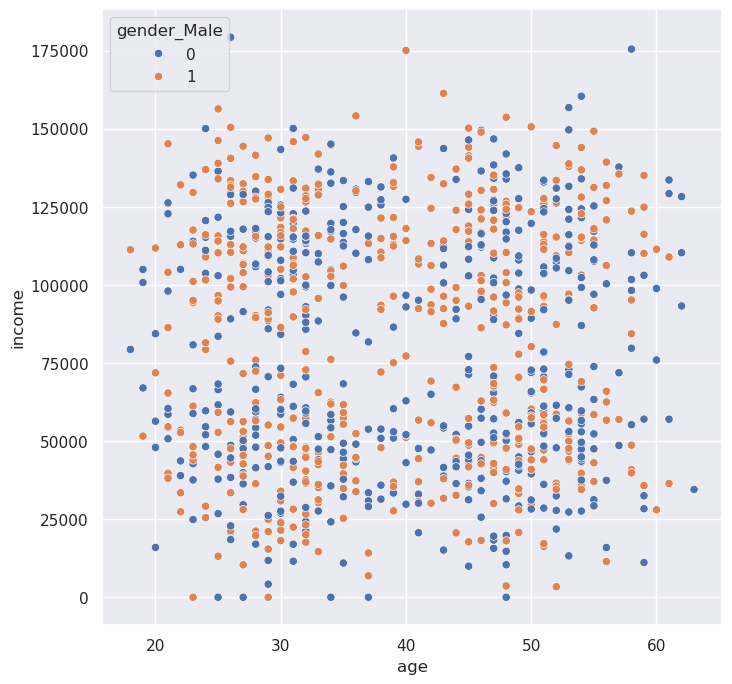

In [103]:
plt.figure(figsize=(8,8))
sbn.scatterplot(data=customer, x='age', y='income', hue='gender_Male');

<Figure size 2000x2000 with 0 Axes>

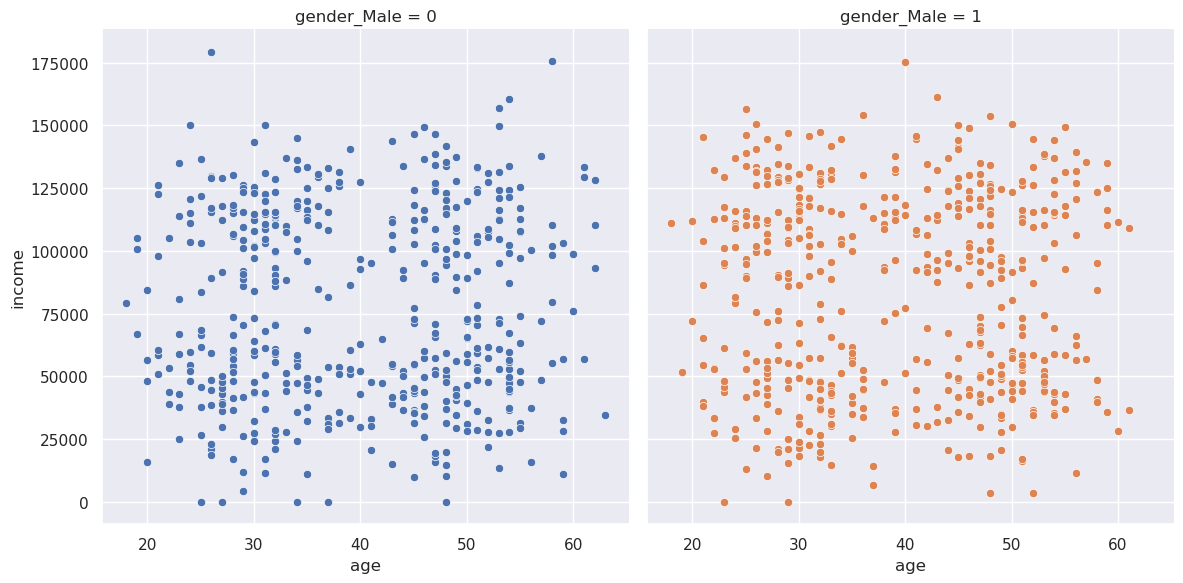

In [104]:
plt.figure(figsize=(20,20))
g = sbn.FacetGrid(customer, col='gender_Male', height=6, aspect=1, hue='gender_Male')
g.map(sbn.scatterplot, 'age', 'income');

# <span style="color: red;">Build cluster model KMeans
## This model helps identify the CENTROID of data clusters

In [105]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist #To compute distance between two points

## <span style="color: yellow;">Cluster using "Age_scaled" and "Income_scaled" (2 factors)

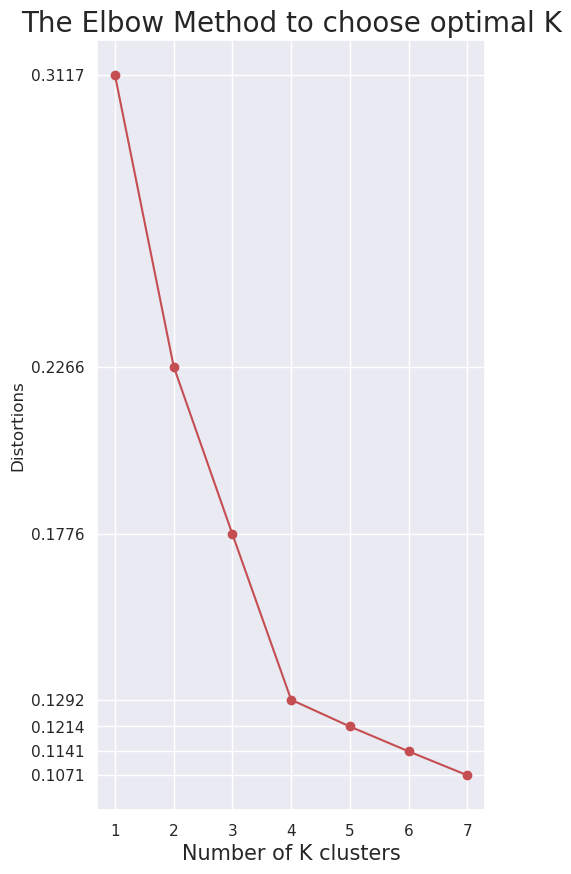

In [106]:
#Choose optimal k by calculating WSSE for number of k_clusters chosen
distortions = [] #to store relevant WSSE
K = range(1,8)

for k in K:
    data = customer_scaled[['age', 'income']]
    kmeanModel = KMeans(n_clusters=k) #Create KMeans model object with n_clusters = k
    kmeanModel.fit(data) #Train model with Age_scaled and Income_scaled data
    WSSE = sum(np.min(cdist(data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0]
    distortions.append(WSSE)

plt.figure(figsize=(5,10))
plt.plot(K, distortions, 'ro-')
plt.xlabel('Number of K clusters', size=15)
plt.ylabel('Distortions')
plt.yticks(distortions)
plt.title('The Elbow Method to choose optimal K', size=20)
plt.show()

Choose k=4 because if increase k up to 5, 6 or 7, the errors rate does not improve significantly

Apply k=4 for KMeansModel

In [107]:
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(customer_scaled[['age','income']])

KMeans(n_clusters=4)

In [108]:
centroids_scaled = kmeanModel.cluster_centers_ #Get the coordinates of centroids, stored in "centroids" variable
print("Scaled Centroids of 4-Mean in MinMax scale:\n", centroids_scaled)

Scaled Centroids of 4-Mean in MinMax scale:
 [[0.26106804 0.64257984]
 [0.69644097 0.25925224]
 [0.25833333 0.24372937]
 [0.6977591  0.64809667]]


In [117]:
minmax = MinMaxScaler.fit(self=minmax, X=customer[['income','age']])

np.set_printoptions(suppress=True) #To convert 1e2 => 100
centroids_normal = minmax.inverse_transform(centroids_scaled) #Undo the MinMaxScaler to get normal centroids coordinates
print("Normal Centroids of 4-mean (no scaled):\n",centroids_normal)

Normal Centroids of 4-mean (no scaled):
 [[ 46807.93402239     46.91609267]
 [124867.68767361     29.66635079]
 [ 46317.61666667     28.96782166]
 [125104.02072829     47.1643502 ]]


In [118]:
labels=kmeanModel.labels_
print(len(labels))
set(labels) #There are 4 labels 0_1_2_3, representing 4 groups

1000


{0, 1, 2, 3}

In [119]:
customer_model1 = customer
customer_model1['Group'] = pd.Series(labels)
customer_model1

,income,age,gender_Male,Group
0,101743,58,0,3
1,49597,27,0,2
2,36517,52,1,1
3,33223,49,1,1
4,72994,53,0,1
...,...,...,...,...
995,70615,29,0,2
996,95102,41,0,3
997,42203,35,1,2
998,16975,31,0,2


In [120]:
customer_model1['Group'].value_counts()

Group
0    258
1    256
2    248
3    238
Name: count, dtype: int64

The number of observations in each group seems equivalent

In [121]:
print("                           Coordinates of each normal Centroids")
i=0
for cluster in centroids_normal:
    print("****Centroid Cluster: " + str(i))
    print("Income:", round(cluster[0],2))
    print("Age:", round(cluster[1],2))
    i+=1
    print()

                           Coordinates of each normal Centroids
****Centroid Cluster: 0
Income: 46807.93
Age: 46.92

****Centroid Cluster: 1
Income: 124867.69
Age: 29.67

****Centroid Cluster: 2
Income: 46317.62
Age: 28.97

****Centroid Cluster: 3
Income: 125104.02
Age: 47.16



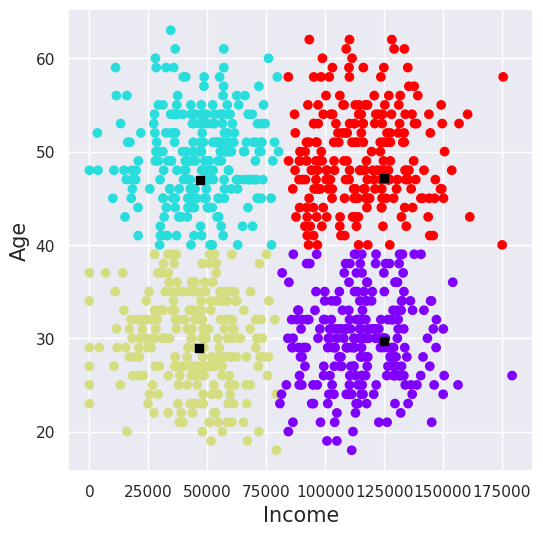

In [122]:
plt.figure(figsize=(6,6))
plt.scatter(x=customer_model1.income, y=customer_model1.age, c=customer_model1.Group, cmap='rainbow')
plt.scatter(x=centroids_normal[:,0], y=centroids_normal[:,1], marker='s', c='black')
plt.xlabel("Income", size=15)
plt.ylabel("Age", size=15)
plt.show()

<b>Can divide customers into 4 groups of Age and Income:
    <pre>Group 1: Age <= 40 and income <= 75000
    <pre>Group 2: Age > 40 and income <= 75000
    <pre>Group 3: Age <= 40 and income > 750000
    <pre>Group 4: Age > 40 and income > 75000

## <span style="color: yellow;">Cluster using "Age_scaled" and "Income_scaled" and "gender_Male" (3 factors)

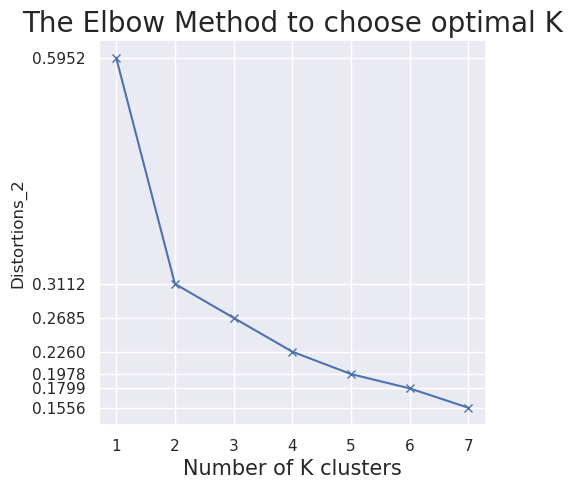

In [123]:
K = range(1,8)
distortions_2 = []

for k in K:
    kmeanModel_2 = KMeans(n_clusters=k)
    kmeanModel_2.fit(customer_scaled)
    WSSE = sum(np.min(cdist(customer_scaled, kmeanModel_2.cluster_centers_, 'euclidean'), axis=1)) / customer_scaled.shape[0]
    distortions_2.append(WSSE)

plt.figure(figsize=(5,5))
plt.plot(K, distortions_2, 'bx-')
plt.xlabel('Number of K clusters', size=15)
plt.ylabel('Distortions_2')
plt.yticks(distortions_2)
plt.title('The Elbow Method to choose optimal K', size=20)
plt.show()

Choose k=4 for KMeans model

In [128]:
kmeanModel_2 = KMeans(n_clusters=4)
kmeanModel_2.fit(customer_scaled)
centroids_scaled_2 = kmeanModel_2.cluster_centers_
labels_2 = kmeanModel_2.labels_

minmax2 = MinMaxScaler().fit(customer.drop('Group', axis=1))
centroids_normal_2 = minmax2.inverse_transform(centroids_scaled_2)

In [129]:
centroids_scaled_2

array([[0.45774063, 0.25681818, 1.        ],
       [0.42796332, 0.70487805, 0.        ],
       [0.43661557, 0.26383173, 0.        ],
       [0.46407278, 0.69014845, 1.        ]])

In [130]:
centroids_normal_2

array([[82070.14772727,    29.55681818,     1.        ],
       [76731.25609756,    49.7195122 ,     0.        ],
       [78282.55144033,    29.87242798,     0.        ],
       [83205.46558704,    49.05668016,     1.        ]])

In [131]:
set(labels_2)

{0, 1, 2, 3}

In [132]:
customer_model2 = customer
customer_model2['Group'] = pd.Series(labels_2)
customer_model2

,income,age,gender_Male,Group
0,101743,58,0,1
1,49597,27,0,2
2,36517,52,1,3
3,33223,49,1,3
4,72994,53,0,1
...,...,...,...,...
995,70615,29,0,2
996,95102,41,0,1
997,42203,35,1,0
998,16975,31,0,2


## Draw 3D grapth because kmeanModel_2 has 3 factors/features
## Using <span style="color:green;">mplot3d

In [133]:
from mpl_toolkits.mplot3d import axes3d

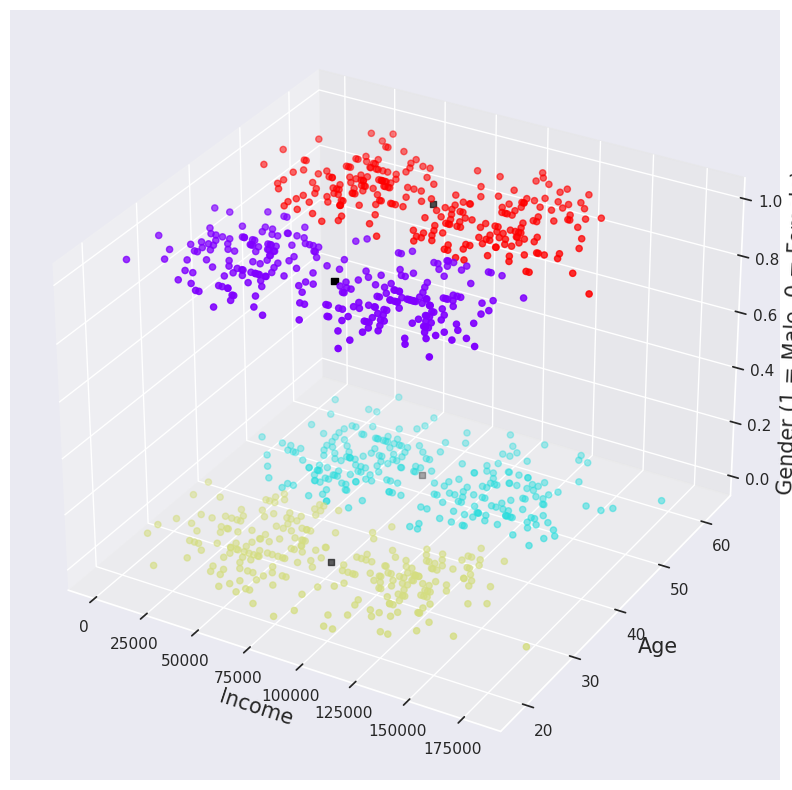

In [134]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d') #111 means 1 row, 1 column, and only 1 subplot
                                           #projection='3d' to specify a 3D plot (default is 2D)

ax.scatter(customer_model2.income, customer_model2.age, customer_model2.gender_Male, c=customer_model2.Group, cmap='rainbow')
ax.scatter(centroids_normal_2[:,0], centroids_normal_2[:,1], centroids_normal_2[:,2], marker='s', c='black')
ax.set_xlabel('Income', size=15)
ax.set_ylabel('Age', size=15)
ax.set_zlabel('Gender (1 = Male, 0 = Female)', size=15)

plt.show()

# The 4 Centroids stretch along "Age" axis and "Gender" axis (not "Income" axis)
# Meaning that only the "Age" and "Gender" have significant impacts on the "customer" data
# Therefore, we can divide customers into 4 groups according to "Age" and "Gender"

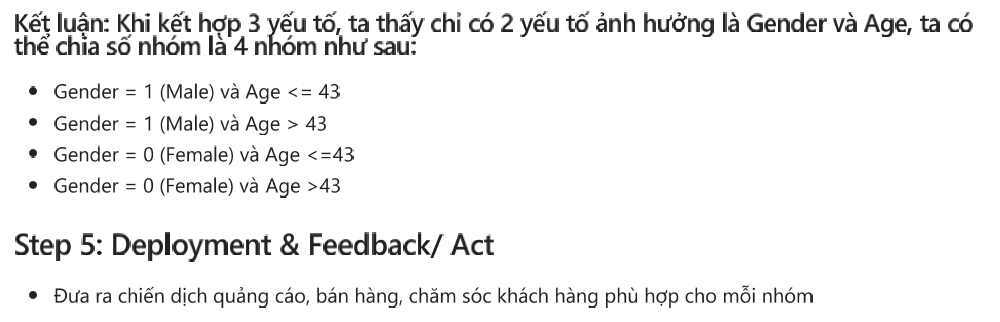